# Riesgo de incumplimiento crediticio de la vivienda

## Librerias

In [1]:
import pandas as pd
from herramientas import obtener_resumen_valores_unicos

import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [2]:
application_test = pd.read_csv('/home/bbchanchis/metadata/home_credit/data/application_test.csv')
application_train = pd.read_csv('/home/bbchanchis/metadata/home_credit/data/application_train.csv')
burea_balance = pd.read_csv('data/bureau_balance.csv')
bureau = pd.read_csv('data/bureau.csv')
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
HomeCredit = pd.read_csv('data/HomeCredit_columns_description.csv', encoding='ISO-8859-1')
installments_payment = pd.read_csv('data/installments_payments.csv')
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
previous_application = pd.read_csv('data/previous_application.csv')

## Visualización de los df

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
obtener_resumen_valores_unicos(application_test)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,48744,48744,0
1,NAME_CONTRACT_TYPE,object,2,48744,0
2,CODE_GENDER,object,2,48744,0
3,FLAG_OWN_CAR,object,2,48744,0
4,FLAG_OWN_REALTY,object,2,48744,0
5,CNT_CHILDREN,int64,11,48744,0
6,AMT_INCOME_TOTAL,float64,606,48744,0
7,AMT_CREDIT,float64,2937,48744,0
8,AMT_ANNUITY,float64,7491,48720,24
9,AMT_GOODS_PRICE,float64,677,48744,0


In [5]:
obtener_resumen_valores_unicos(application_train)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,307511,307511,0
1,TARGET,int64,2,307511,0
2,NAME_CONTRACT_TYPE,object,2,307511,0
3,CODE_GENDER,object,3,307511,0
4,FLAG_OWN_CAR,object,2,307511,0
5,FLAG_OWN_REALTY,object,2,307511,0
6,CNT_CHILDREN,int64,15,307511,0
7,AMT_INCOME_TOTAL,float64,2548,307511,0
8,AMT_CREDIT,float64,5603,307511,0
9,AMT_ANNUITY,float64,13672,307499,12


In [6]:
obtener_resumen_valores_unicos(burea_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_BUREAU,int64,817395,27299925,0
1,MONTHS_BALANCE,int64,97,27299925,0
2,STATUS,object,8,27299925,0


In [7]:
obtener_resumen_valores_unicos(bureau)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_CURR,int64,305811,1716428,0
1,SK_ID_BUREAU,int64,1716428,1716428,0
2,CREDIT_ACTIVE,object,4,1716428,0
3,CREDIT_CURRENCY,object,4,1716428,0
4,DAYS_CREDIT,int64,2923,1716428,0
5,CREDIT_DAY_OVERDUE,int64,942,1716428,0
6,DAYS_CREDIT_ENDDATE,float64,14096,1610875,105553
7,DAYS_ENDDATE_FACT,float64,2917,1082775,633653
8,AMT_CREDIT_MAX_OVERDUE,float64,68251,591940,1124488
9,CNT_CREDIT_PROLONG,int64,10,1716428,0


In [8]:
obtener_resumen_valores_unicos(credit_card_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,104307,3840312,0
1,SK_ID_CURR,int64,103558,3840312,0
2,MONTHS_BALANCE,int64,96,3840312,0
3,AMT_BALANCE,float64,1347904,3840312,0
4,AMT_CREDIT_LIMIT_ACTUAL,int64,181,3840312,0
5,AMT_DRAWINGS_ATM_CURRENT,float64,2267,3090496,749816
6,AMT_DRAWINGS_CURRENT,float64,187005,3840312,0
7,AMT_DRAWINGS_OTHER_CURRENT,float64,1832,3090496,749816
8,AMT_DRAWINGS_POS_CURRENT,float64,168748,3090496,749816
9,AMT_INST_MIN_REGULARITY,float64,312266,3535076,305236


In [9]:
obtener_resumen_valores_unicos(HomeCredit)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,Unnamed: 0,int64,219,219,0
1,Table,object,7,219,0
2,Row,object,196,219,0
3,Description,object,163,219,0
4,Special,object,7,86,133


In [10]:
obtener_resumen_valores_unicos(installments_payment)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,997752,13605401,0
1,SK_ID_CURR,int64,339587,13605401,0
2,NUM_INSTALMENT_VERSION,float64,65,13605401,0
3,NUM_INSTALMENT_NUMBER,int64,277,13605401,0
4,DAYS_INSTALMENT,float64,2922,13605401,0
5,DAYS_ENTRY_PAYMENT,float64,3039,13602496,2905
6,AMT_INSTALMENT,float64,902539,13605401,0
7,AMT_PAYMENT,float64,944235,13602496,2905


In [11]:
obtener_resumen_valores_unicos(pos_cash_balance)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,936325,10001358,0
1,SK_ID_CURR,int64,337252,10001358,0
2,MONTHS_BALANCE,int64,96,10001358,0
3,CNT_INSTALMENT,float64,73,9975287,26071
4,CNT_INSTALMENT_FUTURE,float64,79,9975271,26087
5,NAME_CONTRACT_STATUS,object,9,10001358,0
6,SK_DPD,int64,3400,10001358,0
7,SK_DPD_DEF,int64,2307,10001358,0


In [12]:
obtener_resumen_valores_unicos(previous_application)

,Columna,Tipo de Dato,Valores Únicos,Total Valores,Valores Nulos
0,SK_ID_PREV,int64,1670214,1670214,0
1,SK_ID_CURR,int64,338857,1670214,0
2,NAME_CONTRACT_TYPE,object,4,1670214,0
3,AMT_ANNUITY,float64,357959,1297979,372235
4,AMT_APPLICATION,float64,93885,1670214,0
5,AMT_CREDIT,float64,86803,1670213,1
6,AMT_DOWN_PAYMENT,float64,29278,774370,895844
7,AMT_GOODS_PRICE,float64,93885,1284699,385515
8,WEEKDAY_APPR_PROCESS_START,object,7,1670214,0
9,HOUR_APPR_PROCESS_START,int64,24,1670214,0


## EDA application_train

In [13]:
df = application_train

###  Distribución de género de los solicitantes

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


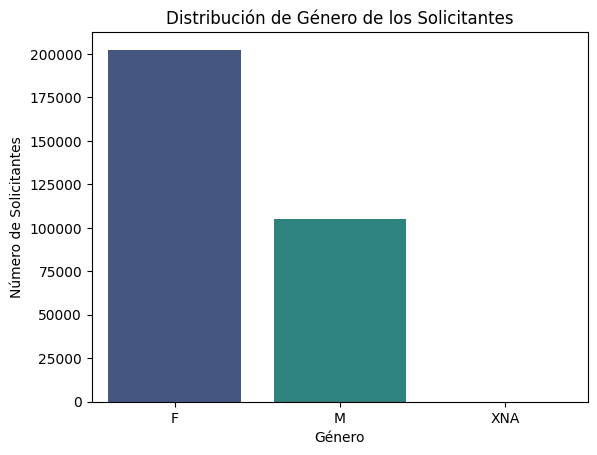

In [14]:
# Contar el número de solicitantes por género
distribucion_genero = df['CODE_GENDER'].value_counts()

# Imprimir la distribución
print(distribucion_genero)

# Visualizar la distribución
sns.barplot(x=distribucion_genero.index, y=distribucion_genero.values, palette="viridis")
plt.title('Distribución de Género de los Solicitantes')
plt.xlabel('Género')
plt.ylabel('Número de Solicitantes')
plt.show()

## Solicitantes poseen un automóvil o una propiedad

In [15]:
# Contar cuántos solicitantes poseen un automóvil
autos = df['FLAG_OWN_CAR'].value_counts()
print("Número de solicitantes que poseen un automóvil:")
print(autos)

# Contar cuántos solicitantes poseen una propiedad
propiedad = df['FLAG_OWN_REALTY'].value_counts()
print("\nNúmero de solicitantes que poseen una propiedad:")
print(propiedad)

Número de solicitantes que poseen un automóvil:
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

Número de solicitantes que poseen una propiedad:
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64


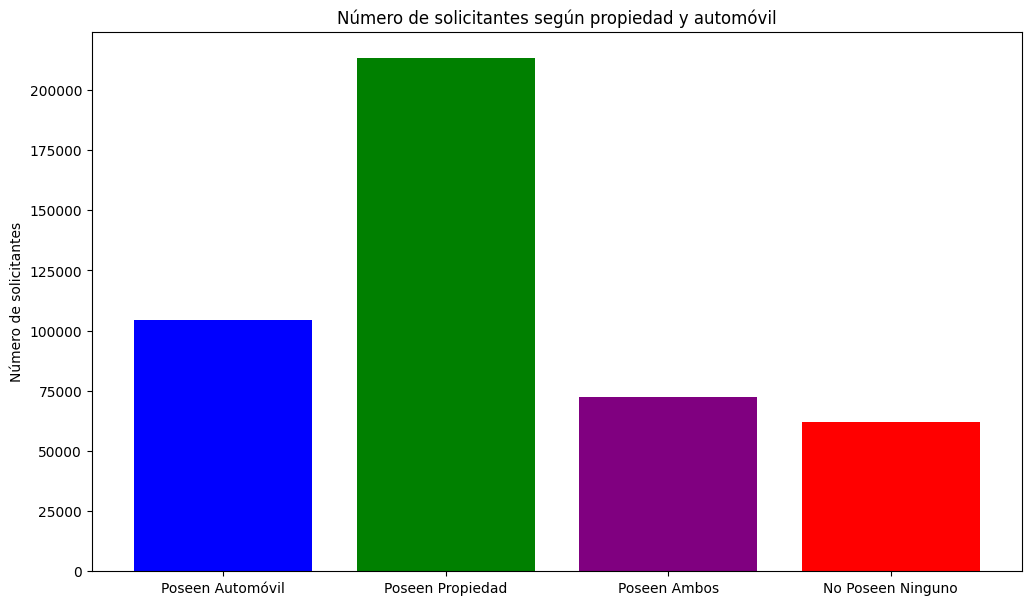

In [16]:
# Calcular el número de solicitantes que poseen un automóvil y/o una propiedad
autos = df[df['FLAG_OWN_CAR'] == 'Y'].shape[0]
propiedad = df[df['FLAG_OWN_REALTY'] == 'Y'].shape[0]
ambos = df[(df['FLAG_OWN_CAR'] == 'Y') & (df['FLAG_OWN_REALTY'] == 'Y')].shape[0]
ninguno = df[(df['FLAG_OWN_CAR'] == 'N') & (df['FLAG_OWN_REALTY'] == 'N')].shape[0]

# Crear una lista con los valores y las etiquetas
valores = [autos, propiedad, ambos, ninguno]
etiquetas = ['Poseen Automóvil', 'Poseen Propiedad', 'Poseen Ambos', 'No Poseen Ninguno']

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
plt.bar(etiquetas, valores, color=['blue', 'green', 'purple', 'red'])
plt.title('Número de solicitantes según propiedad y automóvil')
plt.ylabel('Número de solicitantes')
plt.show()

## Distribución de los solicitantes según el tipo de ingresos, educación, estado civil y tipo de vivienda

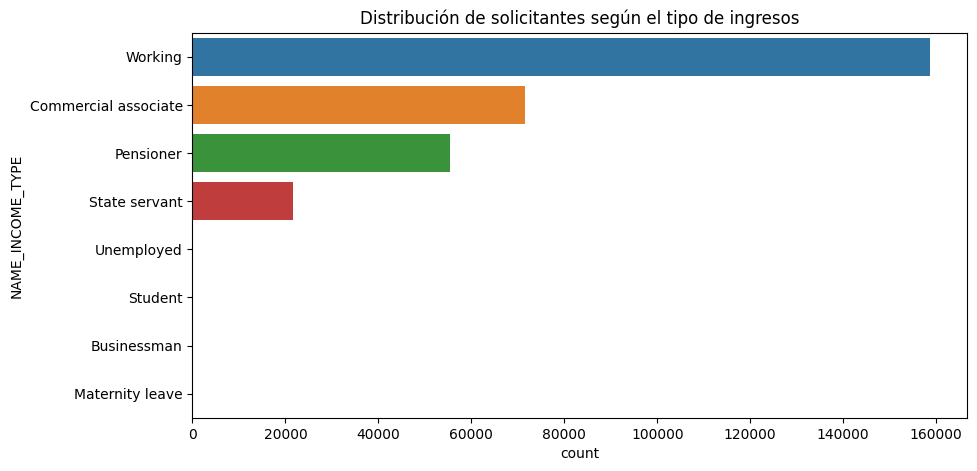

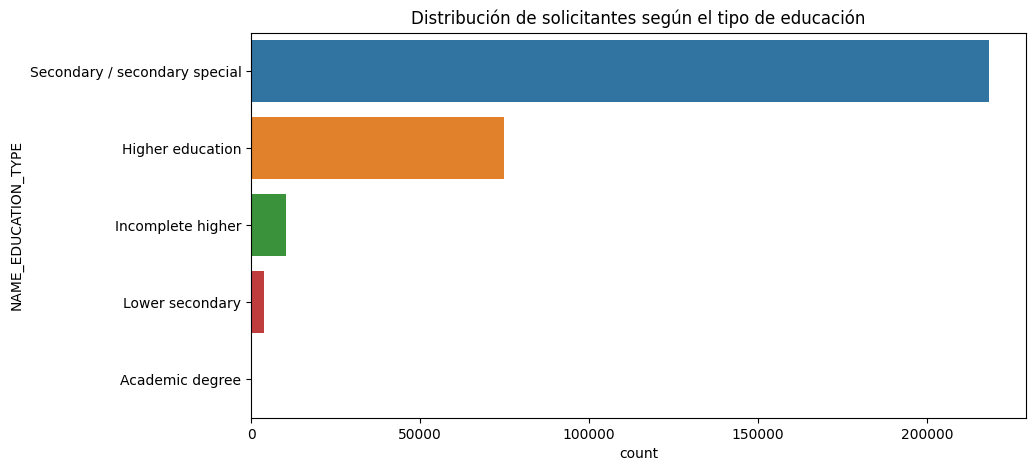

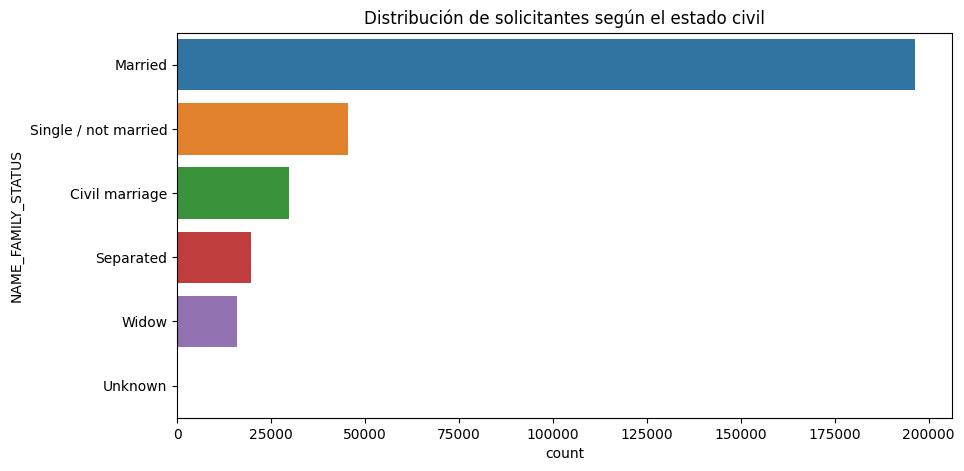

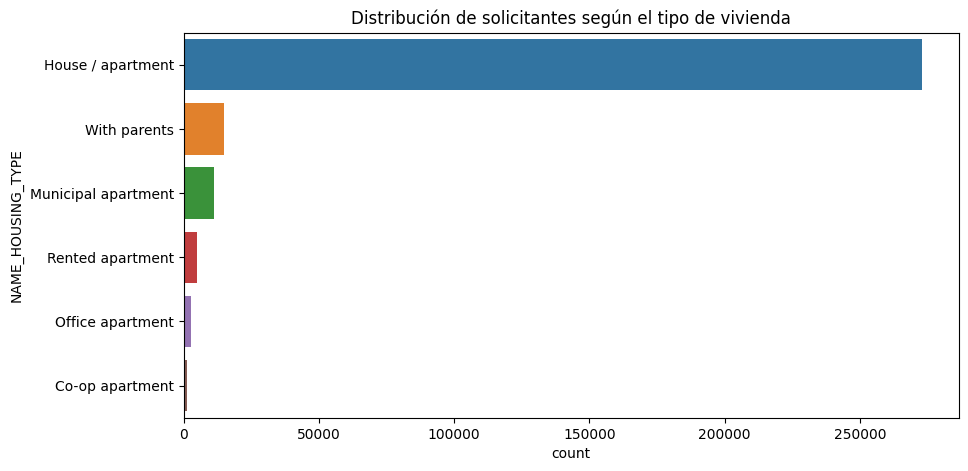

In [17]:
# Distribución según el tipo de ingresos
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_INCOME_TYPE', order=df['NAME_INCOME_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de ingresos')
plt.show()

# Distribución según el tipo de educación
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_EDUCATION_TYPE', order=df['NAME_EDUCATION_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de educación')
plt.show()

# Distribución según el estado civil
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_FAMILY_STATUS', order=df['NAME_FAMILY_STATUS'].value_counts().index)
plt.title('Distribución de solicitantes según el estado civil')
plt.show()

# Distribución según el tipo de vivienda
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='NAME_HOUSING_TYPE', order=df['NAME_HOUSING_TYPE'].value_counts().index)
plt.title('Distribución de solicitantes según el tipo de vivienda')
plt.show()


## Edad media de los solicitantes

In [18]:
edad_media = (-df['DAYS_BIRTH'] / 365.25).mean()  # Usamos un signo negativo porque normalmente estos valores son negativos para representar "hace cuántos días nació".

print(f"La edad media de los solicitantes es de aproximadamente {edad_media:.2f} años.")


La edad media de los solicitantes es de aproximadamente 43.91 años.


## Ingreso medio de los solicitantes

In [19]:
ingreso_medio = df['AMT_INCOME_TOTAL'].mean()

print(f"El ingreso medio de los solicitantes es: {ingreso_medio}")

El ingreso medio de los solicitantes es: 168797.9192969845


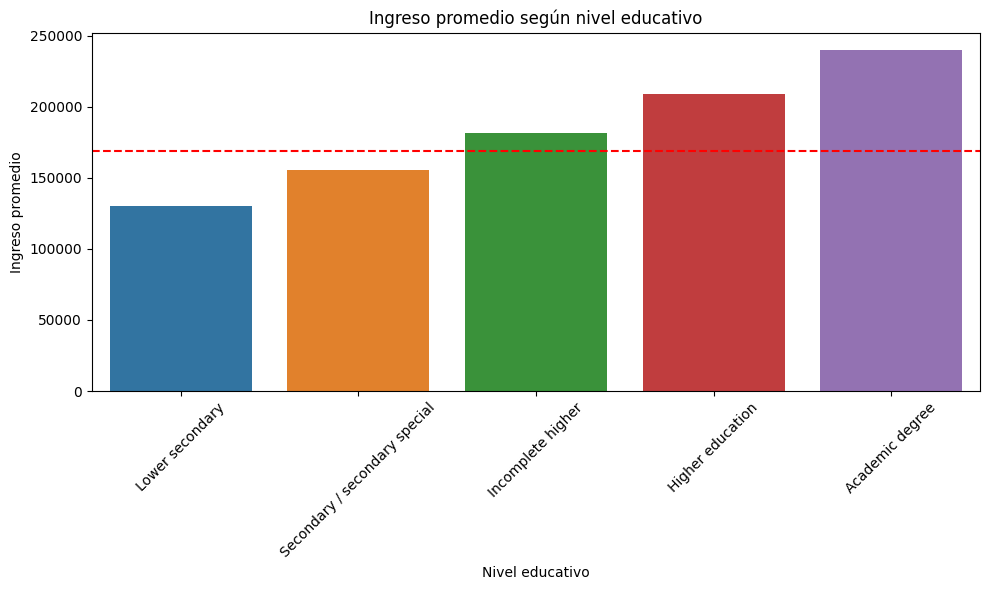

In [20]:
# Agrupamos por nivel educativo y calculamos la media del ingreso
avg_income_education = df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_education.index, y=avg_income_education.values)
plt.title('Ingreso promedio según nivel educativo')
plt.axhline(y=168797.91, color='r', linestyle='--', label='Media de ingresos')
plt.xlabel('Nivel educativo')
plt.ylabel('Ingreso promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

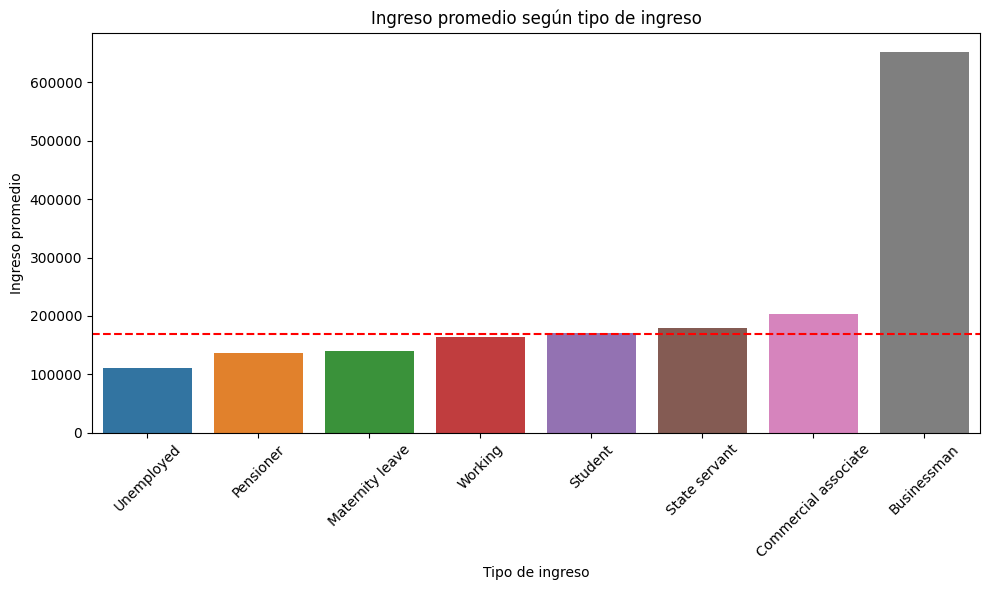

In [21]:
# Agrupamos por tipo de ingreso y calculamos la media del ingreso
avg_income_type = df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_type.index, y=avg_income_type.values)
plt.axhline(y=168797.91, color='r', linestyle='--', label='Media de ingresos')
plt.title('Ingreso promedio según tipo de ingreso')
plt.xlabel('Tipo de ingreso')
plt.ylabel('Ingreso promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlación entre poseer un automóvil y el nivel de ingreso

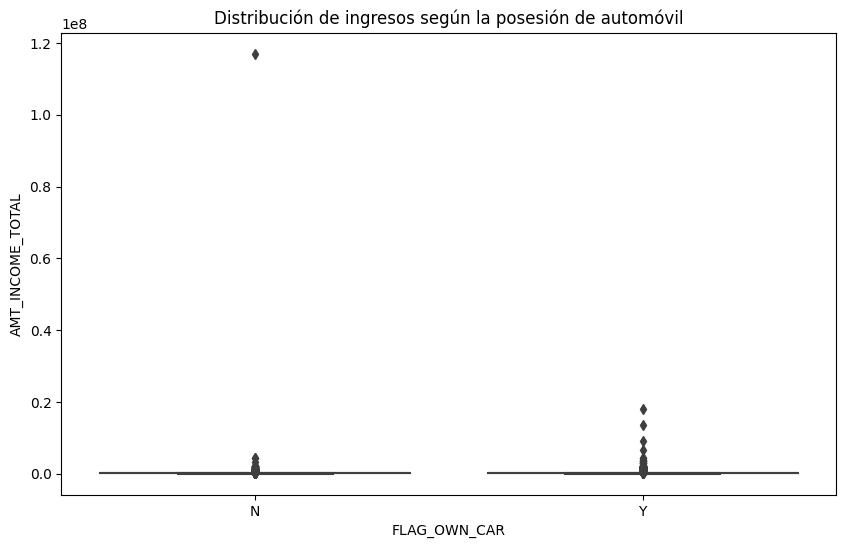

In [22]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_INCOME_TOTAL', data=df)
plt.title('Distribución de ingresos según la posesión de automóvil')
plt.show()

In [23]:
# Filtrar el dataframe para aquellos que no tienen coche
no_car_df = df[df['FLAG_OWN_CAR'] == 'N']

# Calcular el Q1 (cuartil 25) y Q3 (cuartil 75)
Q1 = no_car_df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = no_car_df['AMT_INCOME_TOTAL'].quantile(0.75)

# Calcular el IQR
IQR = Q3 - Q1

# Definir límites para outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [24]:
# Eliminamos outliers 
df1 = df[~((df['FLAG_OWN_CAR'] == 'N') & (df['AMT_INCOME_TOTAL'] < lower_limit) | (df['AMT_INCOME_TOTAL'] > upper_limit))]
df1 = df[~((df['FLAG_OWN_CAR'] == 'Y') & (df['AMT_INCOME_TOTAL'] < lower_limit) | (df['AMT_INCOME_TOTAL'] > upper_limit))]


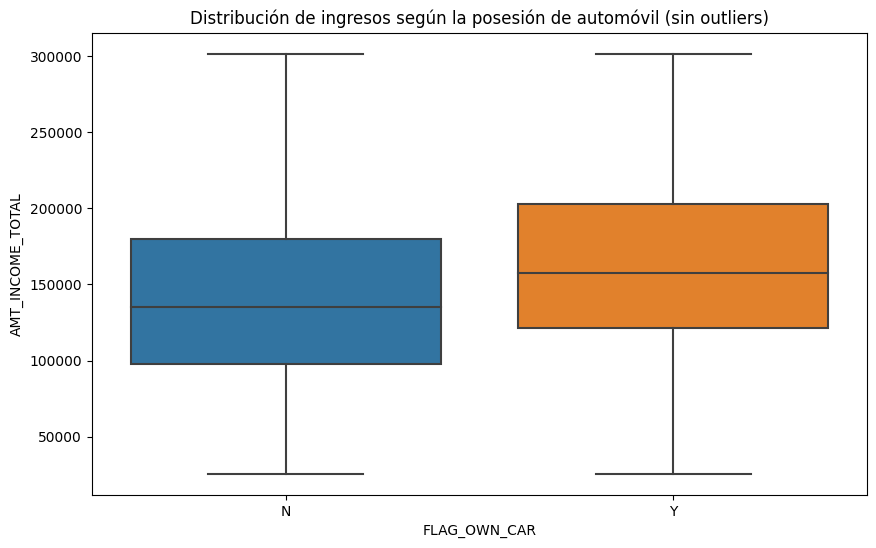

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FLAG_OWN_CAR', y='AMT_INCOME_TOTAL', data=df1)
plt.title('Distribución de ingresos según la posesión de automóvil (sin outliers)')
plt.show()


In [26]:
############ REVISAR ############
from scipy.stats import pointbiserialr

# Convertir la columna de poseer automóvil a valores numéricos (0 para 'N' y 1 para 'Y')
df['FLAG_OWN_CAR_NUM'] = df['FLAG_OWN_CAR'].apply(lambda x: 0 if x == 'N' else 1)

# Calcular el coeficiente de correlación de punto biserial
corr, p_value = pointbiserialr(df['FLAG_OWN_CAR_NUM'], df['AMT_INCOME_TOTAL'])

print(f'Coeficiente de correlación de punto biserial: {corr:.3f}')
print(f'Valor-p: {p_value}')

# Interpretación del coeficiente:
# Valores cercanos a 1 indican una correlación positiva fuerte.
# Valores cercanos a -1 indican una correlación negativa fuerte.
# Valores cercanos a 0 indican poca o ninguna correlación.

Coeficiente de correlación de punto biserial: 0.083
Valor-p: 0.0


## Distribución de la cantidad de crédito solicitado

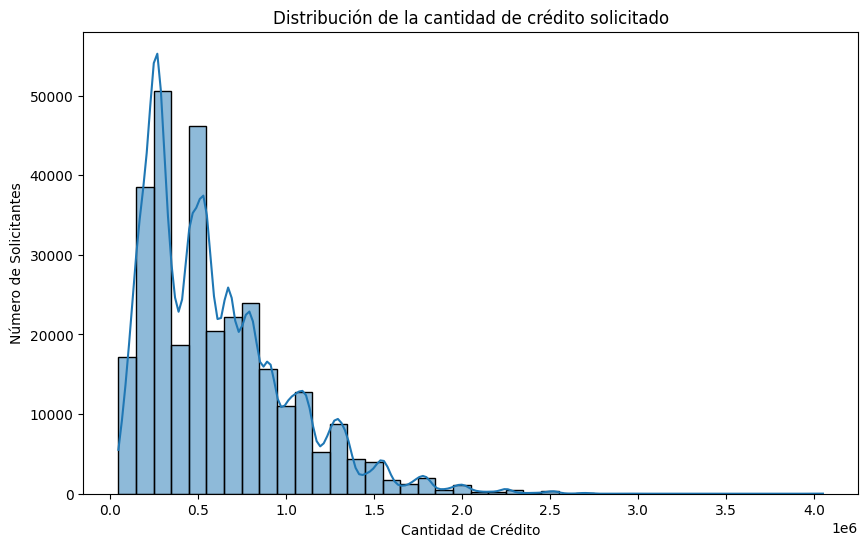

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AMT_CREDIT'], bins=40, kde=True)  # kde=True añade una estimación de densidad de kernel
plt.title('Distribución de la cantidad de crédito solicitado')
plt.xlabel('Cantidad de Crédito')
plt.ylabel('Número de Solicitantes')
plt.show()


##  Relación entre ingreso y cantidad de crédito solicitado

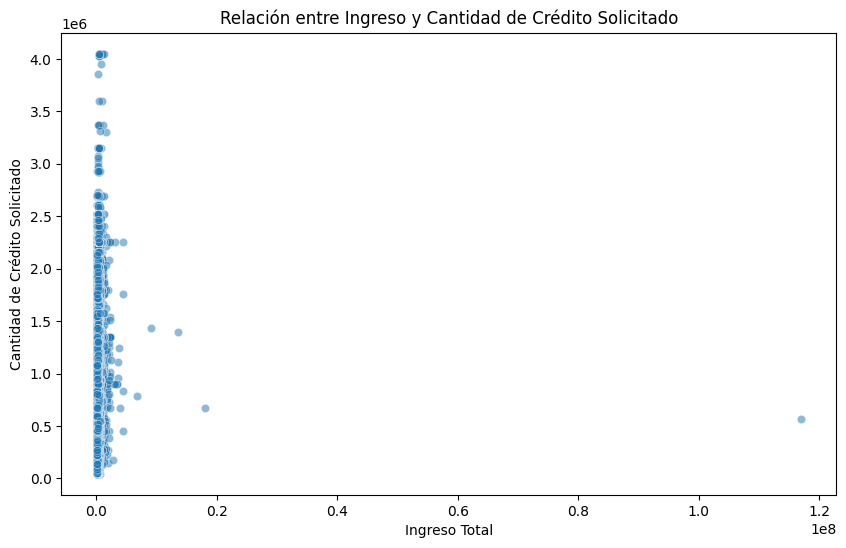

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=df, alpha=0.5)
plt.title('Relación entre Ingreso y Cantidad de Crédito Solicitado')
plt.xlabel('Ingreso Total')
plt.ylabel('Cantidad de Crédito Solicitado')
plt.show()


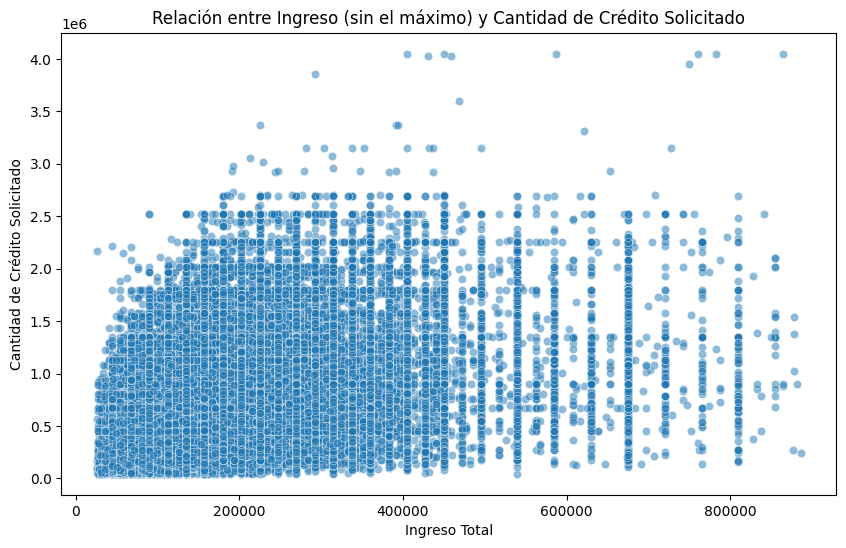

In [37]:
# Filtra el dataframe para excluir el ingreso más alto
max_income = df['AMT_INCOME_TOTAL'].max()
filtered_df = df[df['AMT_INCOME_TOTAL'] < 900000]

plt.figure(figsize=(10,6))
sns.scatterplot(x='AMT_INCOME_TOTAL', y='AMT_CREDIT', data=filtered_df, alpha=0.5)
plt.title('Relación entre Ingreso (sin el máximo) y Cantidad de Crédito Solicitado')
plt.xlabel('Ingreso Total')
plt.ylabel('Cantidad de Crédito Solicitado')
plt.show()

## Diferencia en la cantidad de crédito solicitado según el género o la posesión de bienes

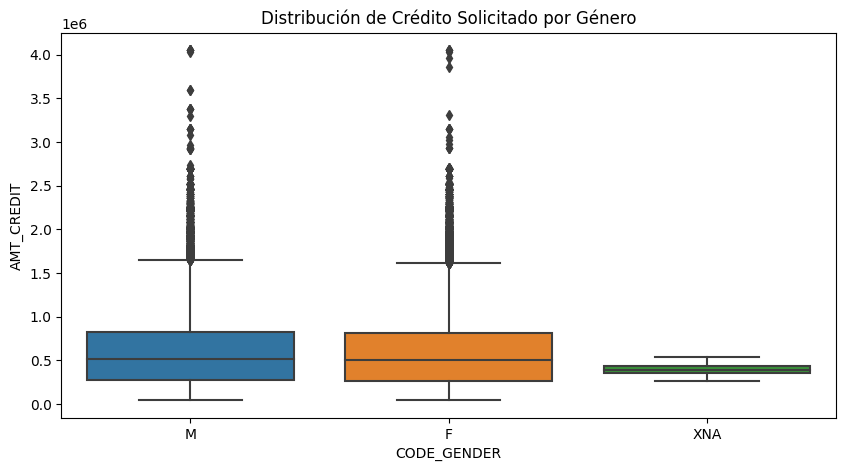

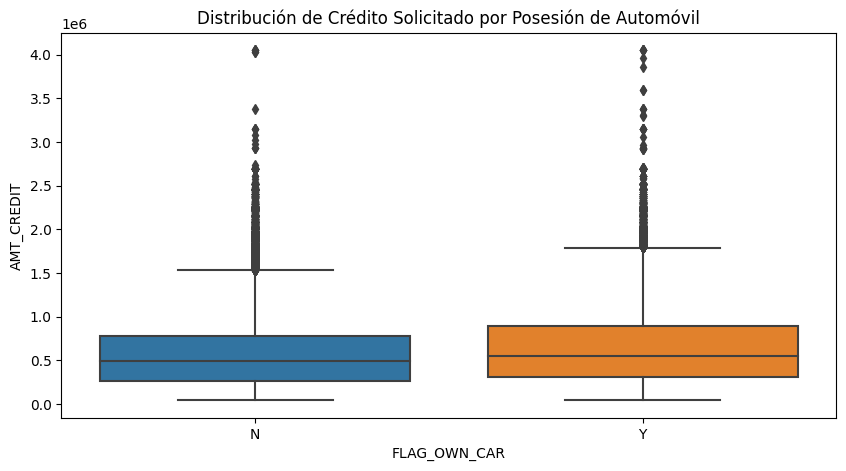

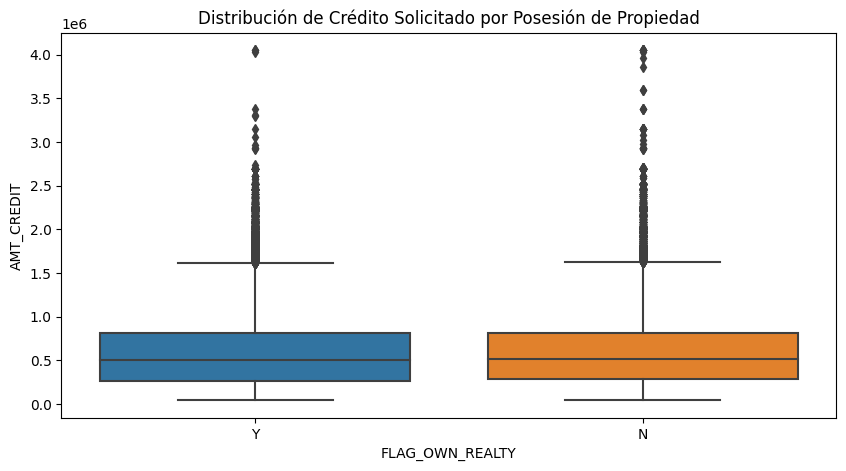

In [38]:
# Visualización de la cantidad de crédito solicitado según el género
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='CODE_GENDER', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Género')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de un automóvil
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='FLAG_OWN_CAR', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Automóvil')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de una propiedad
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='FLAG_OWN_REALTY', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Propiedad')
plt.show()


In [40]:
def remove_outliers(df, column_name):
    '''Función para remover outliers basados en el IQR'''
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    filter = (df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

# Remover outliers para la columna 'AMT_CREDIT'
df_clean = remove_outliers(df, 'AMT_CREDIT')

# Mostrar el tamaño original del DataFrame y después de remover los outliers
print(f"Original size: {df.shape}")
print(f"Size after removing outliers: {df_clean.shape}")


Original size: (307511, 123)
Size after removing outliers: (300949, 123)


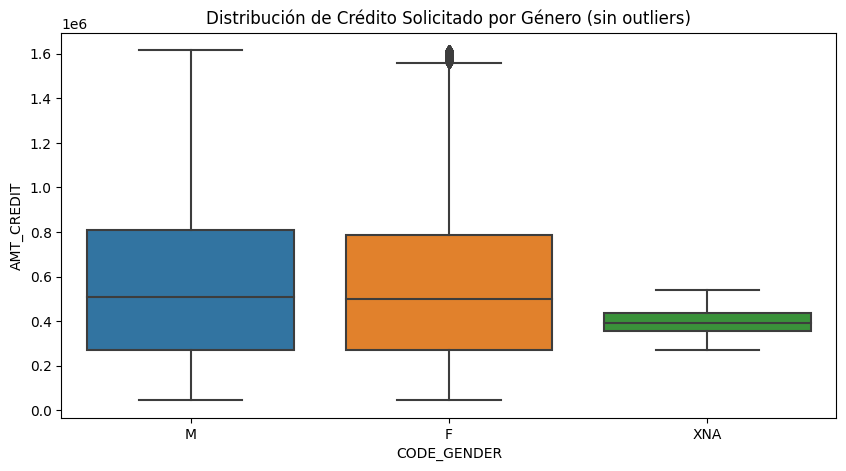

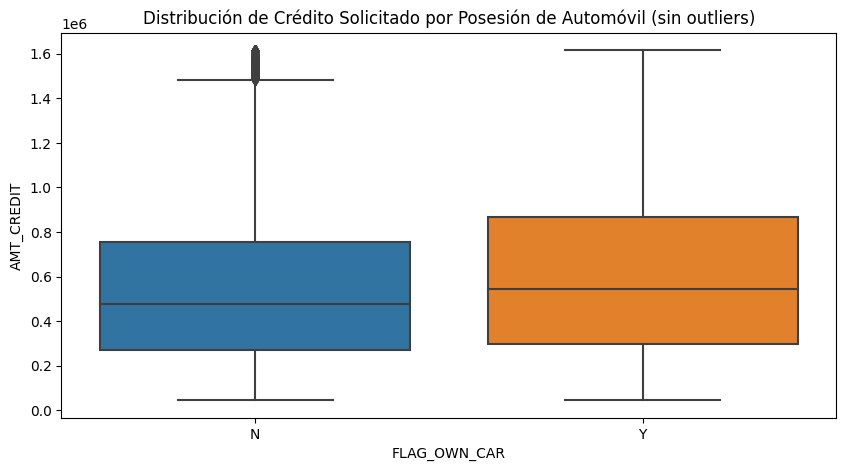

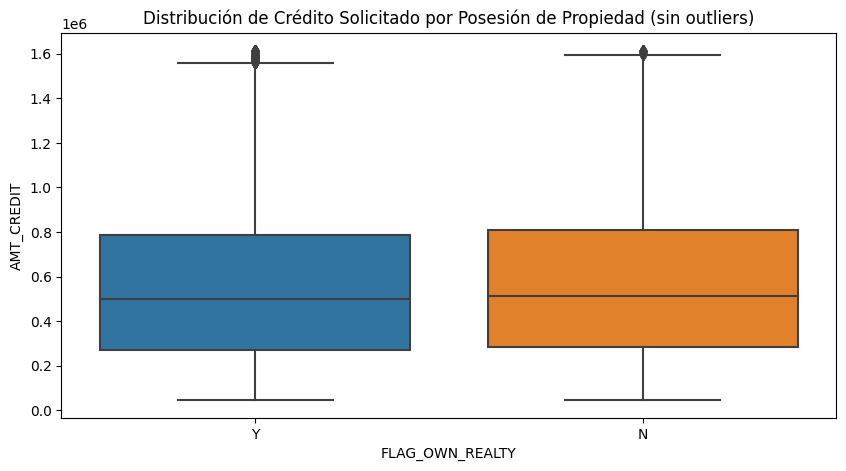

In [41]:
# Visualización de la cantidad de crédito solicitado según el género
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='CODE_GENDER', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Género (sin outliers)')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de un automóvil
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='FLAG_OWN_CAR', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Automóvil (sin outliers)')
plt.show()

# Visualización de la cantidad de crédito solicitado según la posesión de una propiedad
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='FLAG_OWN_REALTY', y='AMT_CREDIT')
plt.title('Distribución de Crédito Solicitado por Posesión de Propiedad (sin outliers)')
plt.show()


In [39]:
######################### REVISAR #####################
from scipy.stats import ttest_ind, mannwhitneyu

# Prueba para diferencias según el género
male_credit = df[df['CODE_GENDER'] == 'M']['AMT_CREDIT']
female_credit = df[df['CODE_GENDER'] == 'F']['AMT_CREDIT']

t_stat, p_val = ttest_ind(male_credit, female_credit)
print(f"Prueba t para género: Estadístico = {t_stat}, p-valor = {p_val}")

# Prueba para diferencias según la posesión de un automóvil
yes_car_credit = df[df['FLAG_OWN_CAR'] == 'Y']['AMT_CREDIT']
no_car_credit = df[df['FLAG_OWN_CAR'] == 'N']['AMT_CREDIT']

u_stat, p_val = mannwhitneyu(yes_car_credit, no_car_credit)
print(f"Prueba U de Mann-Whitney para posesión de automóvil: Estadístico = {u_stat}, p-valor = {p_val}")

# Prueba para diferencias según la posesión de una propiedad
yes_realty_credit = df[df['FLAG_OWN_REALTY'] == 'Y']['AMT_CREDIT']
no_realty_credit = df[df['FLAG_OWN_REALTY'] == 'N']['AMT_CREDIT']

u_stat, p_val = mannwhitneyu(yes_realty_credit, no_realty_credit)
print(f"Prueba U de Mann-Whitney para posesión de propiedad: Estadístico = {u_stat}, p-valor = {p_val}")


Prueba t para género: Estadístico = 11.978846918757943, p-valor = 4.6650710724705164e-33
Prueba U de Mann-Whitney para posesión de automóvil: Estadístico = 12029876875.0, p-valor = 0.0
Prueba U de Mann-Whitney para posesión de propiedad: Estadístico = 9578611749.5, p-valor = 1.2603742929922714e-94


In [ ]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
